<a href="https://colab.research.google.com/github/guigomez36/Personal/blob/main/Encoder64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
import os 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DMEyF/competencia2/datasets_competencia2_2022.csv.gz", low_memory=False)


entreno el encoder con todo el dataset para agregar los features

In [5]:

# creo clase binaria BAJA+1 y BAJA +2 vs CONTINUA
dataset["clase_binaria"] = dataset["clase_ternaria"].apply(lambda x: 0 if x=="CONTINUA" else 1) #CLASE COMBINADA

dataset=dataset.fillna(0) # RELLENO CON 0 LOS NULOS, LO NECESITA LA RED

# quito columnas que no usare en la red
drop = ["clase_binaria","clase_ternaria","foto_mes","numero_de_cliente"]

X_dataset = dataset[dataset.columns.drop(drop)]
y_dataset = dataset["clase_binaria"]

# ESCALADO DE FEATURES
train_max = X_dataset.max()
train_min = X_dataset.min()

#escalo dataset para CNN
X_dataset_data = (X_dataset - train_min)/(train_max - train_min)

X_dataset_data= tf.cast(X_dataset_data, tf.float32)
#y_dataset = tf.cast(y_dataset, tf.float32)

encoder 152 x 64 x 152 (una capa)

Epoch 1/20
3177/3177 [==============================] - 12s 3ms/step - loss: 0.0153
Epoch 2/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0061
Epoch 3/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0059
Epoch 4/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0058
Epoch 5/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0057
Epoch 6/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0056
Epoch 7/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0056
Epoch 8/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0056
Epoch 9/20
3177/3177 [==============================] - 8s 2ms/step - loss: 0.0055
Epoch 10/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0055
Epoch 11/20
3177/3177 [==============================] - 8s 2ms/step - loss: 0.0055
Epoch 12/20
3177/3177 [==============================] - 8s 3ms/step - loss: 0.0054


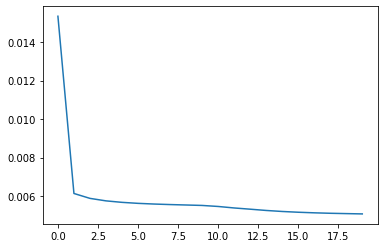

In [6]:
from keras.layers import Input,Dense
from keras.models import Model

# number of neurons in the encoding hidden layer
encoding_dim = 64
# input placeholder
input_data = Input(shape=(152,)) # 6 is the number of features/columns
# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation ='relu')(input_data)
# decoder is the lossy reconstruction of the input
decoded = Dense(152, activation ='sigmoid')(encoded) # 6 again number of features and should match input_data

# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# model optimizer and loss
autoencoder = Model(input_data, decoded)

# loss function and optimizer
autoencoder.compile(optimizer='adam', loss='mae')
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# train test split
#from sklearn.model_selection import train_test_split
#x_train, x_test, = train_test_split(data, test_size=0.1, random_state=42)


# train the model
history=autoencoder.fit(X_dataset_data,
                X_dataset_data,
                epochs=20,
                batch_size=256,
                shuffle=True)

autoencoder.summary()

# predict after training
# note that we take them from the *test* set
#encoded_data = encoder.predict(X_dataset_data)
#plt.plot(history.history["loss"], label="Training Loss")

In [7]:
encoded_data = encoder.predict(X_dataset_data)

25413/25413 [==============================] - 29s 1ms/step


In [8]:
col=[]
for i in range(0,64):
  col.append('col' + str(i))
  #print (i)

In [9]:
encoded_data1 = pd.DataFrame(encoded_data, columns=col)

In [10]:
res=pd.concat([dataset,encoded_data1],axis=1)

In [11]:
res.head()

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63
0,31115668,202101,1,0,0,56,132,1897.12,24324.75,940.32,...,0.0,0.698471,0.577250,0.226030,0.642272,0.781393,0.924623,0.483993,0.932576,0.671979
1,31115678,202101,1,0,0,48,100,-384.72,33860.45,-515.53,...,0.0,0.264926,0.476182,0.951864,0.357612,0.715581,0.109994,0.769183,0.223742,0.495413
2,31117415,202101,1,0,0,60,53,-3622.66,-21310.32,2442.04,...,0.0,0.510652,0.249194,0.446248,0.645992,0.904999,0.411627,0.700567,0.568078,0.584027
3,31117711,202101,1,0,0,46,273,14542.05,125727.99,1037.77,...,0.0,0.762946,0.138546,0.536300,0.381061,0.689117,0.982969,0.584852,0.542698,1.142154
4,31118145,202101,1,0,0,47,192,1868.27,37305.29,1496.68,...,0.0,1.077486,0.165534,0.499103,0.397619,0.867552,0.744869,0.515313,0.527497,0.769799


In [12]:
res.to_csv("/content/drive/MyDrive/Colab Notebooks/DMEyF/competencia2/datasets_competencia2_2022_vf.csv.gz", index=False, compression="gzip")